#0. Environment Setting

In [ ]:
import pandas as pd
import numpy as np
import chardet
import glob
import os
from scipy import stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as patches


In [ ]:
!pip install hmmlearn
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 5.2 MB/s eta 0:00:00


#3. HMM Model Training

###3.1 Model Training

In [ ]:
df_AVI = pd.read_csv("/content/Final_AVI_Data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Final_AVI_Data.csv'

In [ ]:
# Create a copy of the input DataFrame for stage labeling
df_train = df_AVI.copy()

# Initialize a list to store results
results = []

# Define the number of lifecycle stages (HMM hidden states)
n_states = 4

# Loop through each game and train an HMM model individually
for game in df_train['Name'].unique():
    subset = df_train[df_train['Name'] == game].copy()

    # Use AVI as the input feature and reshape to 2D
    X = subset[['AVI']].values

    # Train the HMM model
    model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000, random_state=42)
    model.fit(X)

    # Predict the hidden states (lifecycle stages)
    hidden_states = model.predict(X)
    subset['State'] = hidden_states

    # Append the result for this game
    results.append(subset)

# Combine the results from all games
hmm_result = pd.concat(results).reset_index(drop=True)

In [ ]:
# see
hmm_result[['Name', 'Week', 'AVI', 'State']]

,Name,Week,AVI,State
0,Dawn of kingdoms,2022-03-28,27.301462,0
1,Dawn of kingdoms,2022-04-04,27.217605,0
2,Dawn of kingdoms,2022-04-11,27.030308,0
3,Dawn of kingdoms,2022-04-18,26.678620,0
4,Dawn of kingdoms,2022-04-25,26.314991,0
...,...,...,...,...
1953,Zenless Zone Zero - 1st Anniv.,2025-04-07,24.984623,1
1954,Zenless Zone Zero - 1st Anniv.,2025-04-14,24.970653,1
1955,Zenless Zone Zero - 1st Anniv.,2025-04-21,25.183571,1
1956,Zenless Zone Zero - 1st Anniv.,2025-04-28,24.881246,1


In [ ]:
# save
hmm_result.to_csv("HMM_Labeled_Lifecycle.csv", index=False)

#4. HMM result Visualization

###4.1. pre-processing

In [ ]:
#import data result
hmm_result = pd.read_csv("/content/HMM_Labeled_Lifecycle.csv")
hmm_result

,Name,Week,AVI,State
0,Dawn of kingdoms,2022-03-28,27.301462,0
1,Dawn of kingdoms,2022-04-04,27.217605,0
2,Dawn of kingdoms,2022-04-11,27.030308,0
3,Dawn of kingdoms,2022-04-18,26.678620,0
4,Dawn of kingdoms,2022-04-25,26.314991,0
...,...,...,...,...
1953,Zenless Zone Zero - 1st Anniv.,2025-04-07,24.984623,1
1954,Zenless Zone Zero - 1st Anniv.,2025-04-14,24.970653,1
1955,Zenless Zone Zero - 1st Anniv.,2025-04-21,25.183571,1
1956,Zenless Zone Zero - 1st Anniv.,2025-04-28,24.881246,1


### 4.2 result Visualization: Final

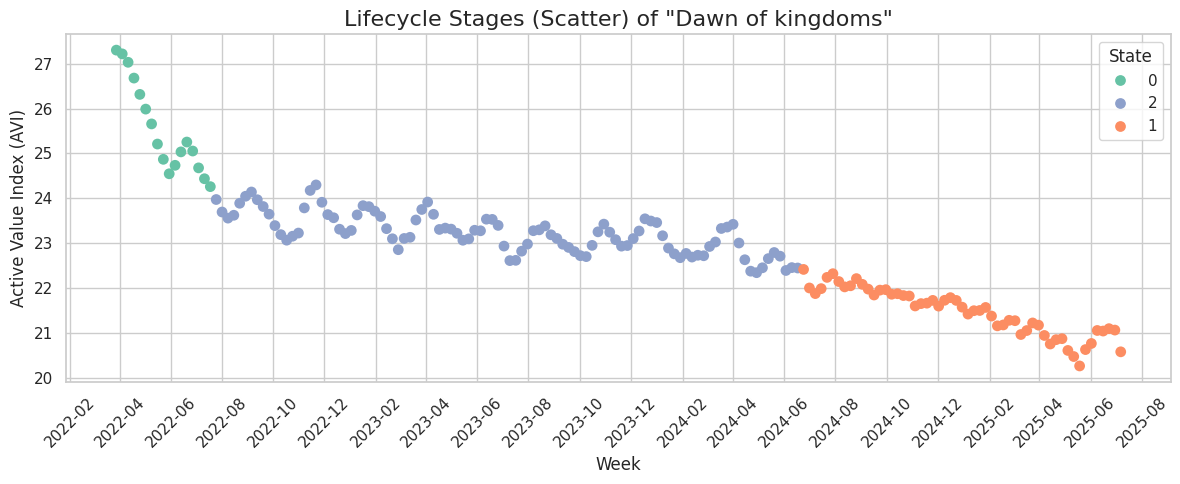

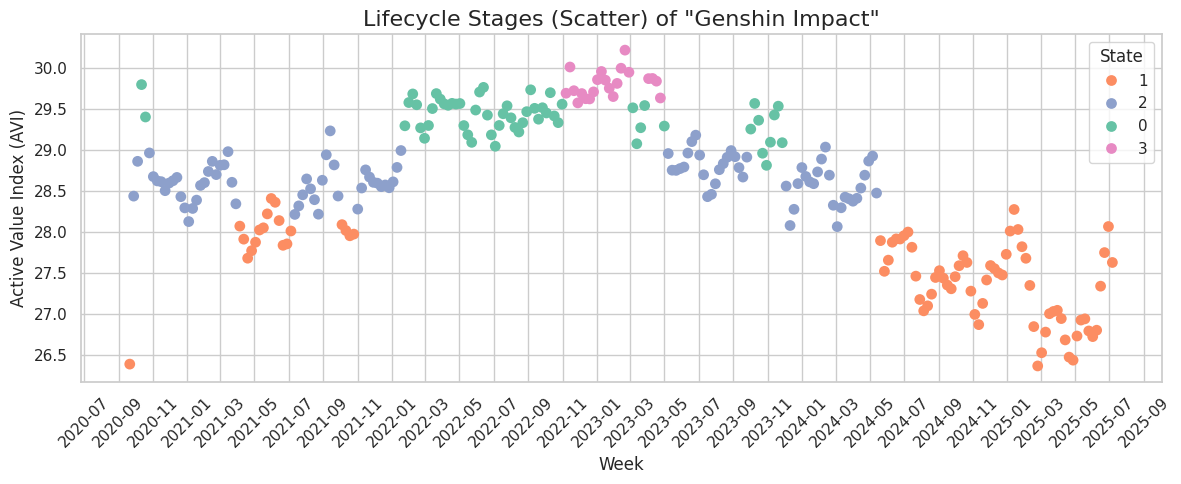

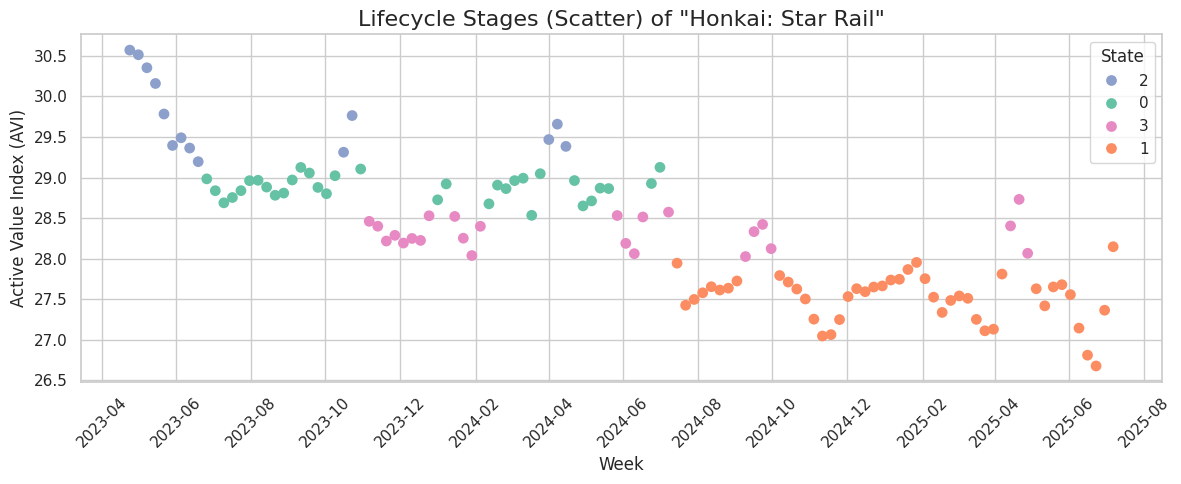

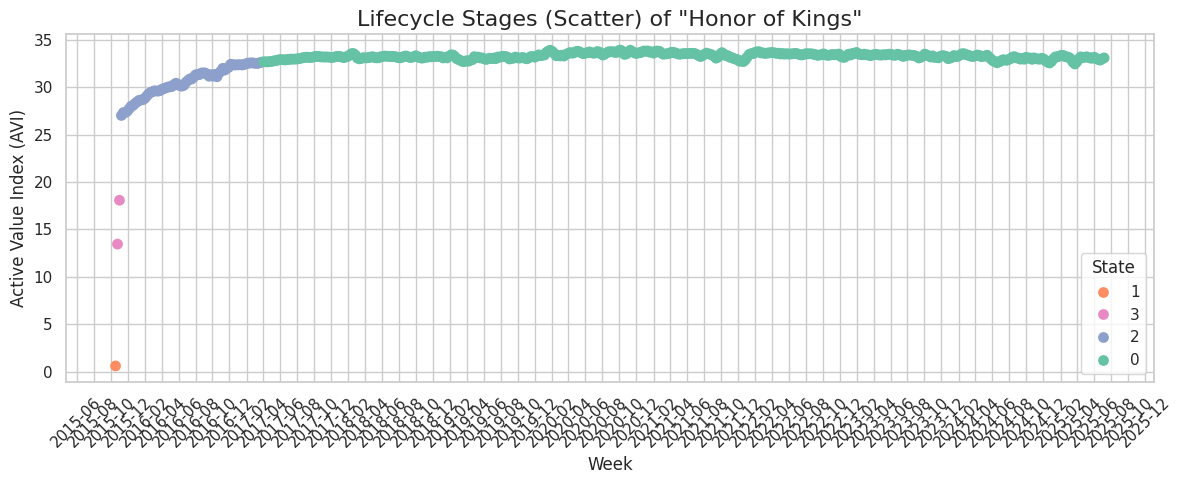

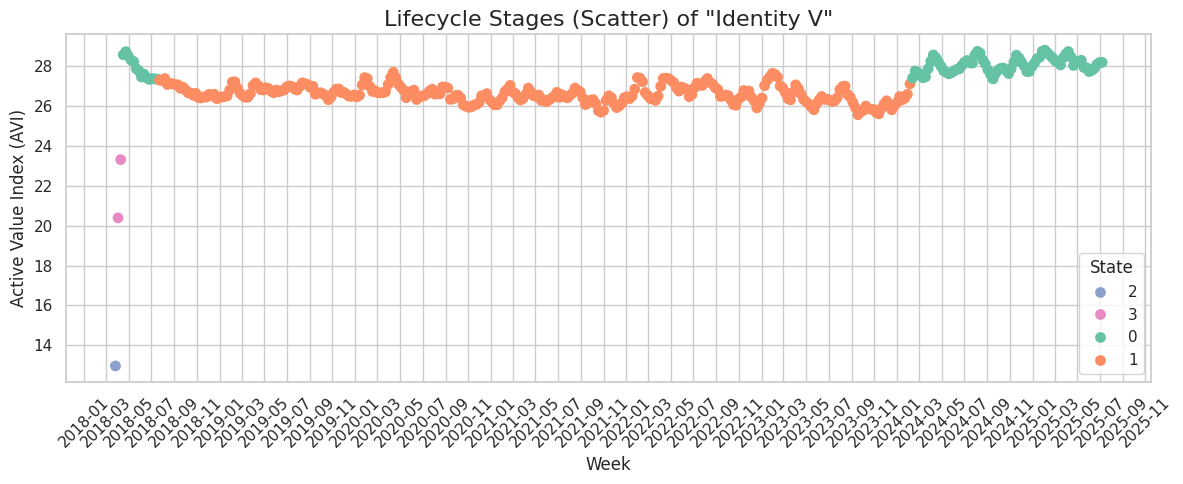

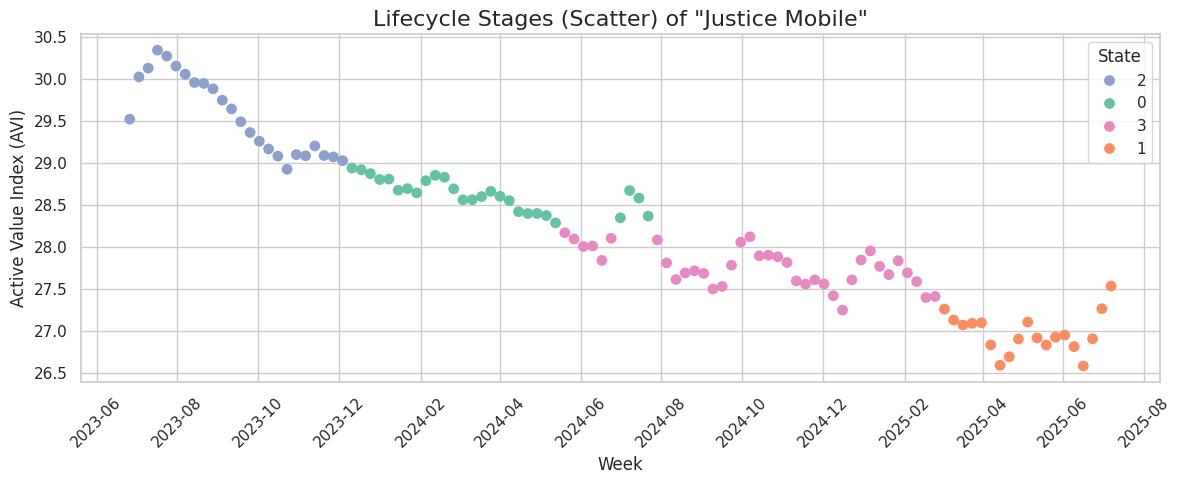

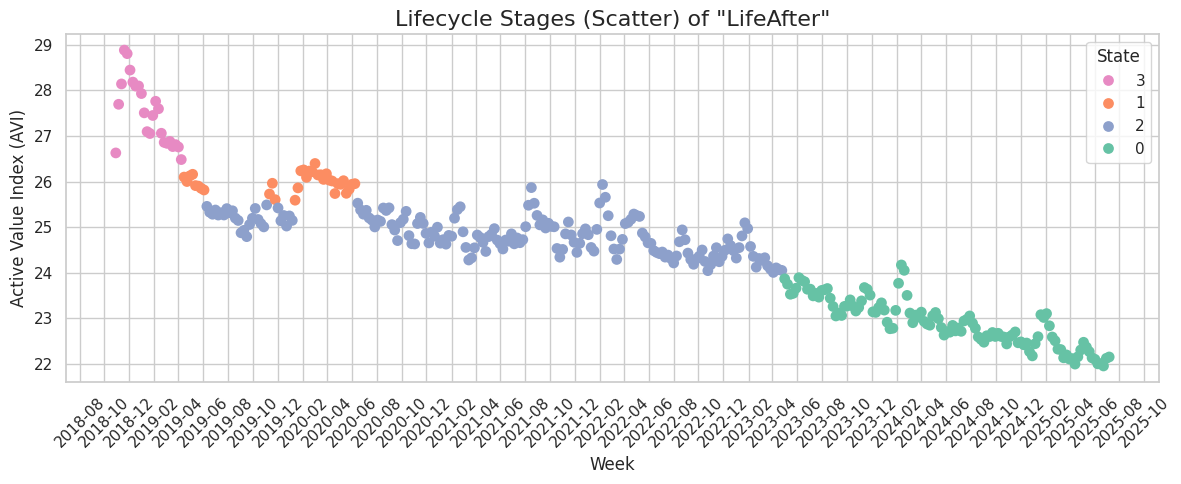

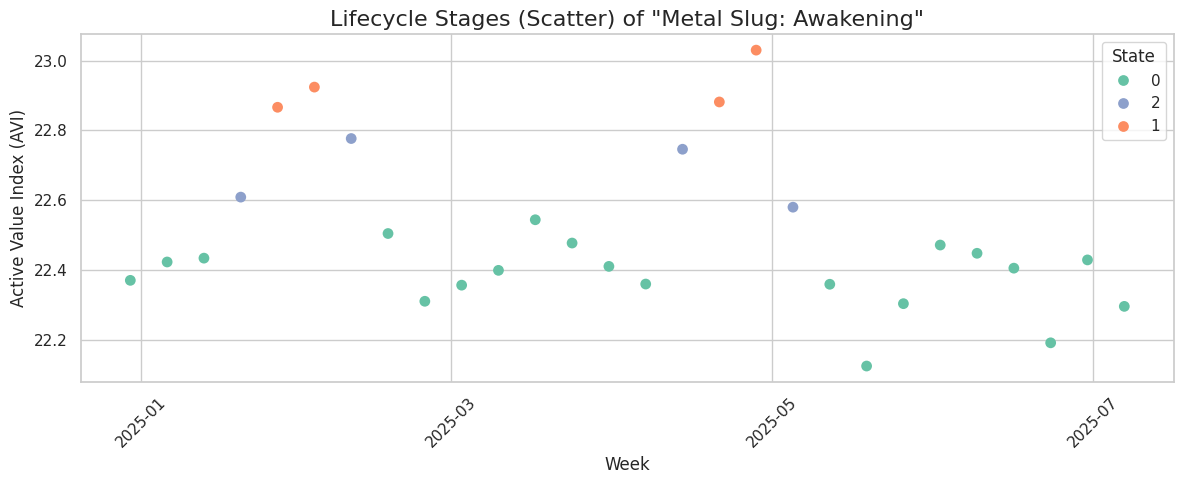

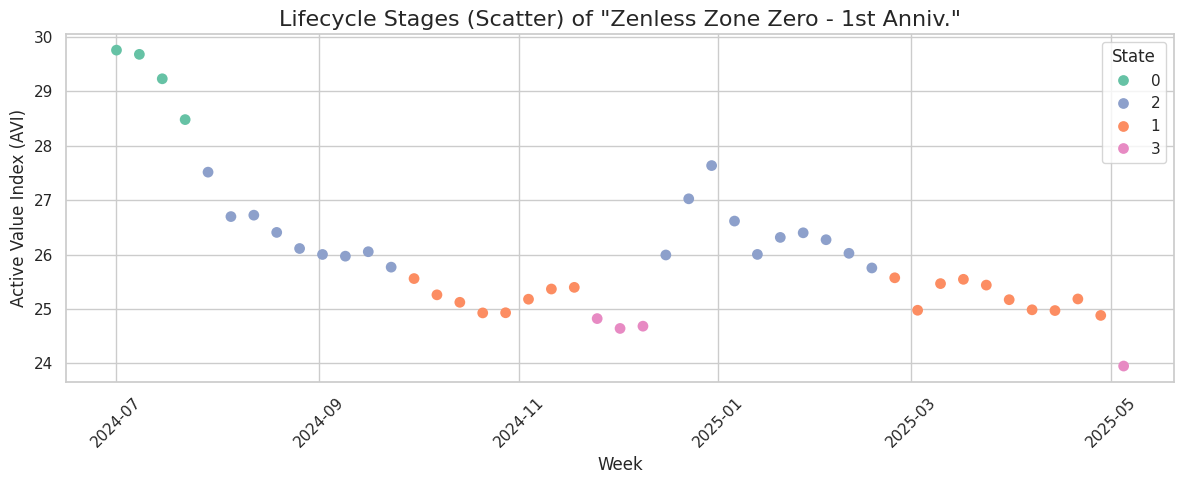

In [ ]:
# Set style
sns.set(style='whitegrid')

# Color palette for HMM states
state_palette = {
    "0": "#66c2a5",  # soft green
    "1": "#fc8d62",  # orange
    "2": "#8da0cb",  # blue
    "3": "#e78ac3"   # pink
}

# Ensure Week column is datetime
hmm_result['Week'] = pd.to_datetime(hmm_result['Week'])

# Convert State to string for consistent legend
hmm_result['State'] = hmm_result['State'].astype(str)

# Loop to draw for each game
for game in hmm_result['Name'].unique():
    subset = hmm_result[hmm_result['Name'] == game].copy()

    plt.figure(figsize=(12, 5))

    # Scatter plot by State
    sns.scatterplot(
        data=subset,
        x='Week',
        y='AVI',
        hue='State',
        palette=state_palette,
        s=60,
        edgecolor=None,
        linewidth=0
    )

    # Format x-axis ticks
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    # Titles and labels
    plt.title(f'Lifecycle Stages (Scatter) of "{game}"', fontsize=16)
    plt.xlabel('Week')
    plt.ylabel('Active Value Index (AVI)')
    plt.legend(title='State')  # show numerical state directly
    plt.tight_layout()
    plt.show()


###4.3 Stage Route Visual

####1.all route

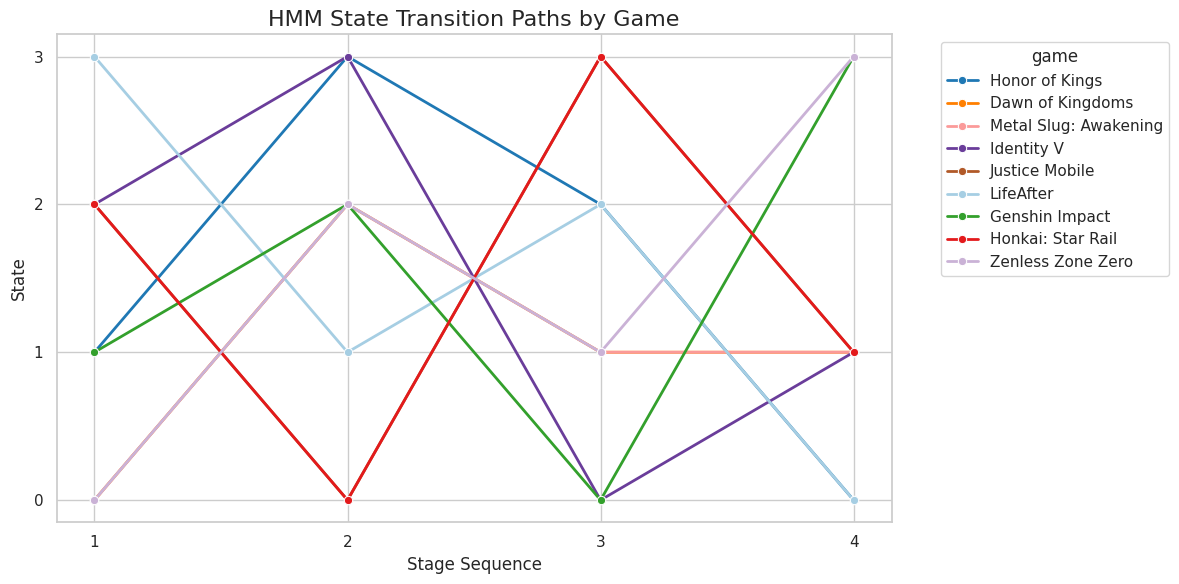

In [ ]:
# read Excel
df = pd.read_excel("/content/stage route.xlsx")

# to_numeric
df['stage'] = pd.to_numeric(df['stage'], errors='coerce')
df['state'] = pd.to_numeric(df['state'], errors='coerce')

# style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
game_palette = {
    "Honor of Kings": "#1f78b4",     # blue
    "Dawn of Kingdoms": "#ff7f00",   # orange
    "Genshin Impact": "#33a02c",     # green
    "Honkai: Star Rail": "#e31a1c",  # red
    "Identity V": "#6a3d9a",         # purple
    "Justice Mobile": "#b15928",     # brown
    "LifeAfter": "#a6cee3",         # light blue
    "Metal Slug: Awakening": "#fb9a99",  # pink
    "Zenless Zone Zero": "#cab2d6"   # light purple
}

# draw for all
sns.lineplot(
    data=df,
    x='stage',
    y='state',
    hue='game',
    palette=game_palette,
    marker='o',
    linewidth=2,
    markersize=6
)

# title&label
plt.title('HMM State Transition Paths by Game', fontsize=16)
plt.xlabel('Stage Sequence')
plt.ylabel('State')
plt.legend(title='game', bbox_to_anchor=(1.05, 1), loc='upper left')

# Xstick
plt.xticks(range(int(df['stage'].min()), int(df['stage'].max()) + 1))
plt.yticks(sorted(df['state'].unique()))

plt.tight_layout()
plt.show()

####2. Seperate route

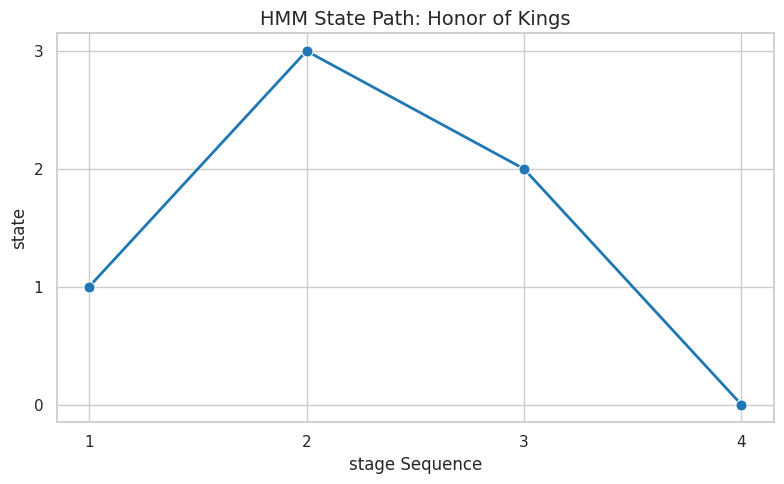

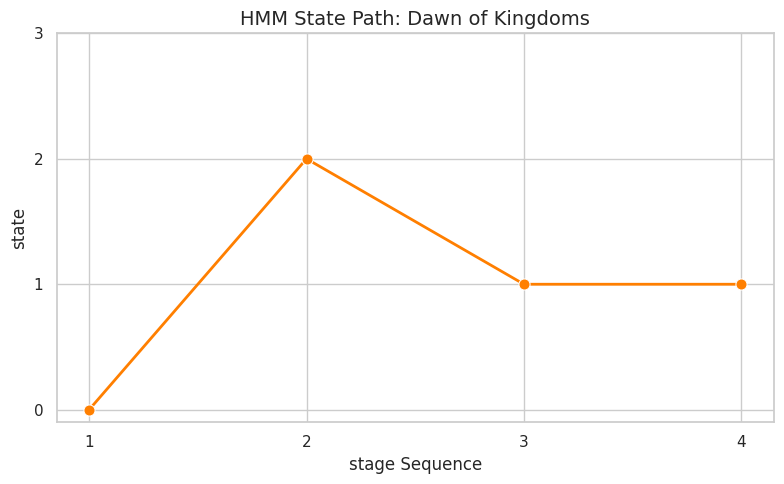

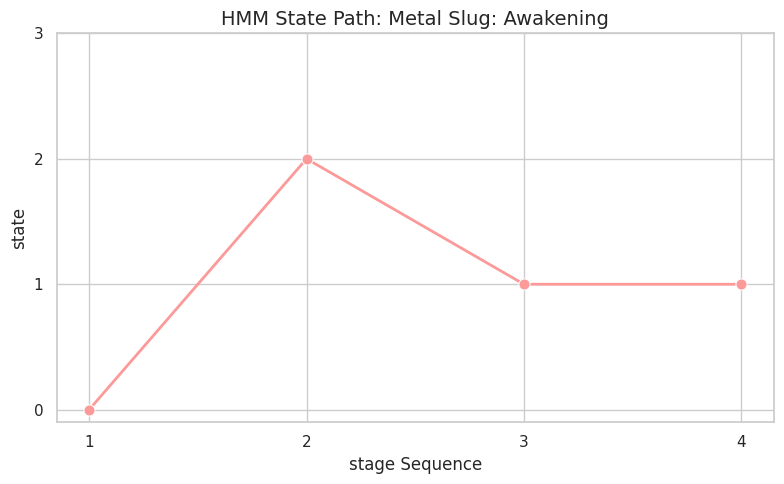

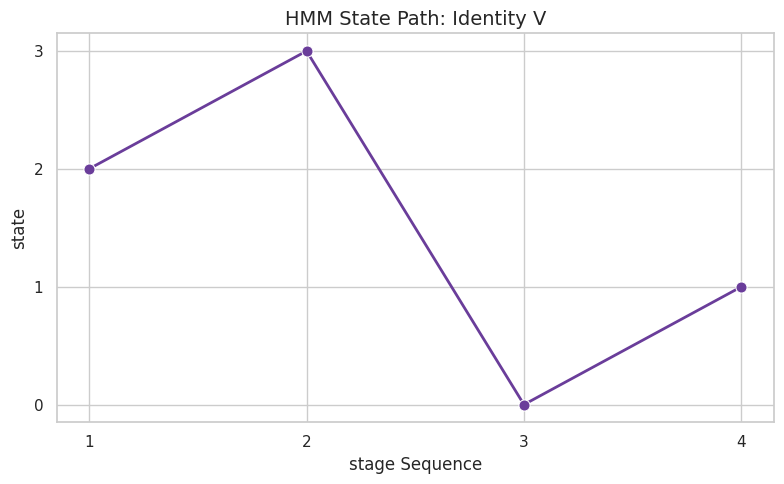

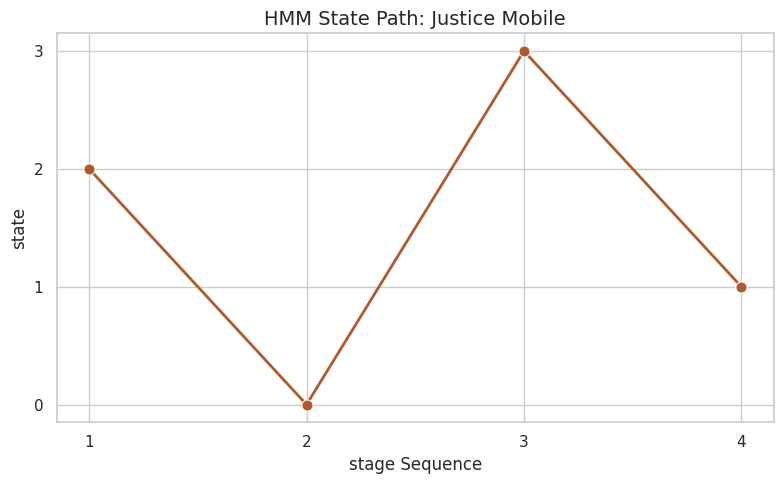

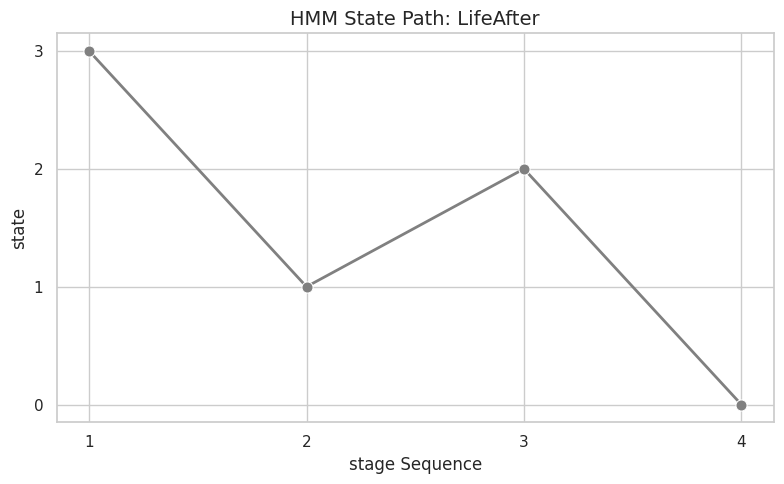

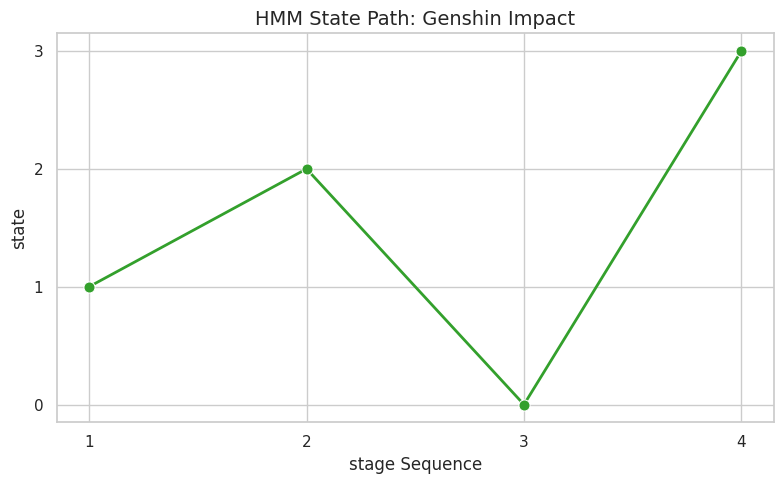

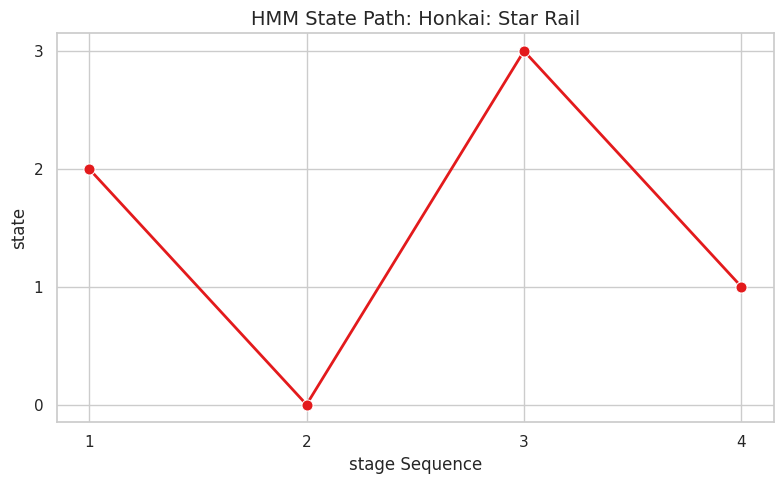

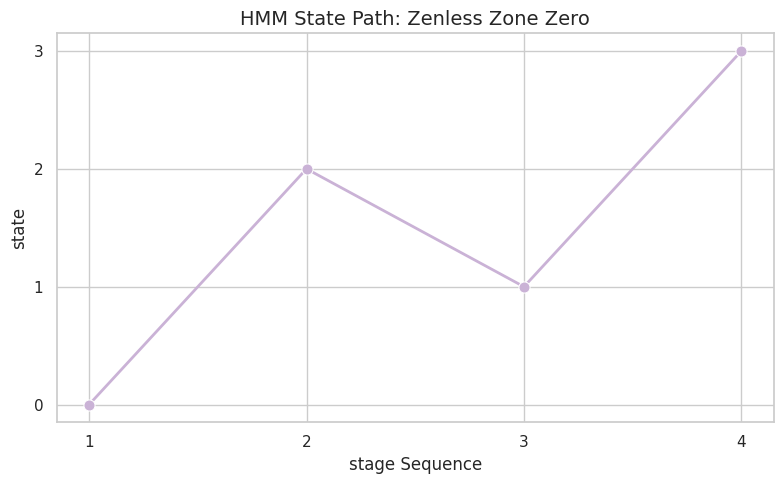

In [ ]:
# read Excel
df = pd.read_excel("/content/stage route.xlsx")

# to_numeric
df['stage'] = pd.to_numeric(df['stage'], errors='coerce')
df['state'] = pd.to_numeric(df['state'], errors='coerce')

# style
sns.set(style='whitegrid')
game_palette = {
    "Honor of Kings": "#1f78b4",     # blue
    "Dawn of Kingdoms": "#ff7f00",   # orange
    "Genshin Impact": "#33a02c",     # green
    "Honkai: Star Rail": "#e31a1c",  # red
    "Identity V": "#6a3d9a",         # purple
    "Justice Mobile": "#b15928",     # brown
    "Life After": "#a6cee3",         # light blue
    "Metal Slug: Awakening": "#fb9a99",  # pink
    "Zenless Zone Zero": "#cab2d6"   # light purple
}

# draw for every game
for game in df['game'].unique():
    subset = df[df['game'] == game].copy()

    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=subset,
        x='stage',
        y='state',
        marker='o',
        color=game_palette.get(game, "gray"),  # apply palette
        linewidth=2,
        markersize=8
    )

    # title&label
    plt.title(f'HMM State Path: {game}', fontsize=14)
    plt.xlabel('stage Sequence')
    plt.ylabel('state')

    # Xstick
    plt.xticks(range(int(subset['stage'].min()), int(subset['stage'].max()) + 1))
    plt.yticks(sorted(df['state'].unique()))

    plt.tight_layout()
    plt.show()
